In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Exploração inicial

In [4]:
# Leitura do arquivo
df = pd.read_csv('DelayedFlights.csv')

In [5]:
# Uma olhada inicial nas colunas e estrutura dos dados
print(df.dtypes)
df.iloc[0]

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object


Unnamed: 0                0
Year                   2008
Month                     1
DayofMonth                3
DayOfWeek                 4
DepTime              2003.0
CRSDepTime             1955
ArrTime              2211.0
CRSArrTime             2225
UniqueCarrier            WN
FlightNum               335
TailNum              N712SW
ActualElapsedTime     128.0
CRSElapsedTime        150.0
AirTime               116.0
ArrDelay              -14.0
DepDelay                8.0
Origin                  IAD
Dest                    TPA
Distance                810
TaxiIn                  4.0
TaxiOut                 8.0
Cancelled                 0
CancellationCode          N
Diverted                  0
CarrierDelay            NaN
WeatherDelay            NaN
NASDelay                NaN
SecurityDelay           NaN
LateAircraftDelay       NaN
Name: 0, dtype: object

In [6]:
# Dropando essa colunas do dataframe devido a não serem necessários/muito correlaconados/redundantes
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

C:\Users\Thiago\AppData\Local\Temp\ipykernel_11252\4054389721.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
c:\Users\Thiago\anaconda3\lib\site-packages\seaborn\matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


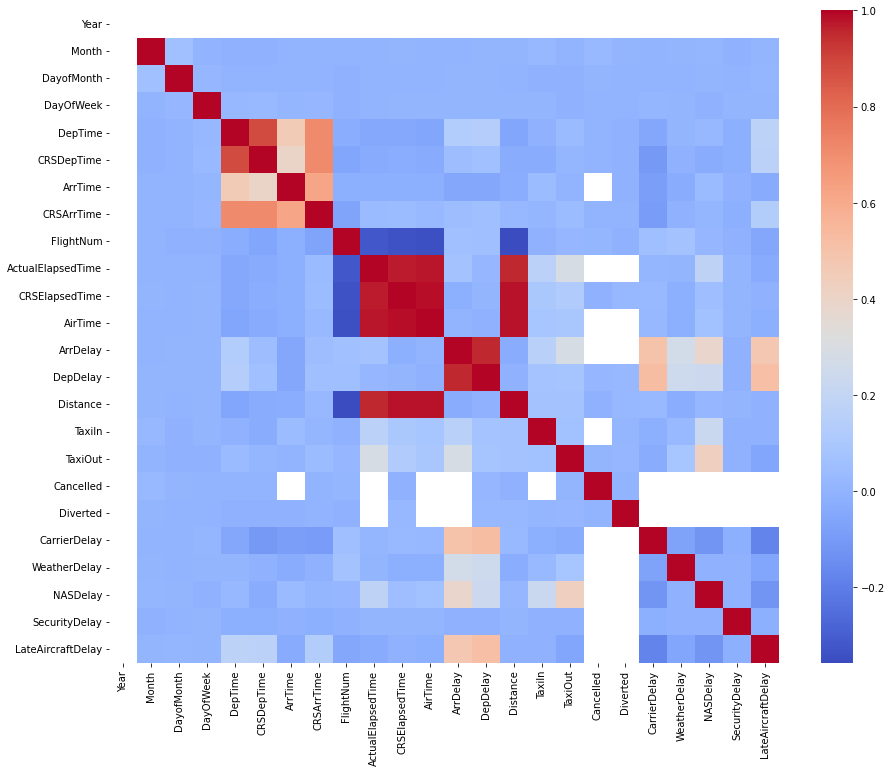

In [7]:
# Analisando a correlação das colunas para ver se existe alguma correlação inesperada entre os dados
correlation_matrix = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Permutation Importance

In [48]:
# Copiando o df para não alterar o original
feature_importance_df = df.copy()

In [49]:
# Criando um atributo alvo para ser previsto pelo Randon Forest e em seguida feita a análise de importancia
feature_importance_df['Delayed'] = (df['ArrDelay'] > 15).astype(int)

In [50]:
feature_importance_df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Delayed'],
      dtype='object')

In [51]:
feature_importance_df.loc[feature_importance_df['CarrierDelay'].isna() !=True]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,1
5,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0,1
7,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,...,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0,1
9,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,...,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0,0
11,2008,1,3,4,1323.0,1255,1526.0,1510,WN,4,...,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936751,2008,12,13,6,921.0,830,1112.0,1008,DL,1616,...,21.0,0,N,0,51.0,0.0,13.0,0.0,0.0,1
1936752,2008,12,13,6,1552.0,1520,1735.0,1718,DL,1620,...,7.0,0,N,0,0.0,0.0,0.0,0.0,17.0,1
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0,1
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0,1


In [52]:
feature_importance_df.drop(['ArrDelay', 'CRSDepTime', 'CRSArrTime', 'CRSElapsedTime', 'ActualElapsedTime', 'FlightNum','TailNum'], axis = 1, inplace = True)

In [53]:
# Verificando quantos voos foram cancelados
feature_importance_df[feature_importance_df['Cancelled'] == 1].shape

(633, 23)

In [54]:
# Removendo os voos cancelados, poucas observações ok de remover
feature_importance_df = feature_importance_df[feature_importance_df['Cancelled'] != 1]

In [55]:
# Verificando valores nulos nas colunas
feature_importance_df.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
ArrTime                6477
UniqueCarrier             0
AirTime                7754
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 6477
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         688637
WeatherDelay         688637
NASDelay             688637
SecurityDelay        688637
LateAircraftDelay    688637
Delayed                   0
dtype: int64

In [56]:
# Removendo voos com tempos de voo nulos, poucas observações ok de remover
feature_importance_df.dropna(subset = ['AirTime'], inplace = True)

In [57]:
# Verificando valores nulos nas colunas
feature_importance_df.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
ArrTime                   0
UniqueCarrier             0
AirTime                   0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
Delayed                   0
dtype: int64

In [58]:
# As colunas que sobraram como nulos podem ser preenchidas com 0 já que de fato os null significam 0 minutos de atrasos daquele tipo.
# Na coluna placa teve 3 nulos, como são só 3 e provavelmente é uma coluna irrelevante para a previsão, ok por 0 nelas
feature_importance_df.fillna({
    'CarrierDelay': 0,
    'WeatherDelay': 0,
    'NASDelay': 0,
    'SecurityDelay': 0,
    'LateAircraftDelay': 0
}, inplace = True)

In [59]:
#feature_importance_df['NonControllableDelays'] = feature_importance_df[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum(axis=1)
feature_importance_df.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay','DepDelay'], axis = 1, inplace = True)

In [60]:
# Dict para salvar o de para do label encoding
de_para_dict = {}
# Aplicando LabelEncoder em cada coluna
for column in ['UniqueCarrier', 'Origin', 'Dest', 'CancellationCode']:
    le = LabelEncoder()
    feature_importance_df[column] = le.fit_transform(feature_importance_df[column])
    # Armazenando o De Para para cada coluna
    de_para_dict[column] = dict(zip(le.classes_, range(len(le.classes_))))

## Código para calcular o feature importance
Estudar melhor o funcionamento da função permutation_importance e explorar mais os dados dependendo

In [61]:
# Separando features e target
X = feature_importance_df.drop(columns=['Delayed'])
y = feature_importance_df['Delayed']

In [62]:
X.shape

(1928371, 16)

In [63]:
# Treinando o modelo Random Forest
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [64]:
# Calculando Permutation Importance
result = permutation_importance(rf, X, y, n_repeats=10, random_state=0, n_jobs = 5)

In [66]:
# Criando DataFrame para mostrar as importâncias
permutation_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)
permutation_importance_df

,Feature,Importance
10,Distance,0.231014
12,TaxiOut,0.198374
7,AirTime,0.182287
5,ArrTime,0.172039
4,DepTime,0.171153
6,UniqueCarrier,0.132644
11,TaxiIn,0.092786
8,Origin,0.069581
1,Month,0.063603
9,Dest,0.044652
